## 機械学習モデルにおける特徴量重要度
機械学習を用いて簡単な分類問題に取り組み，モデルの予測に寄与している特徴量重要度を算出＆可視化してみましょう．\
データセットにはワインの品質を

In [82]:
from sklearn.datasets import load_breast_cancer

df = load_breast_cancer(as_frame=True).frame

In [131]:
x.columns.values

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype=object)

# 線形モデル（ロジスティック回帰）の場合
特徴量重要度の可視化は，線形モデルであれば非常に簡単です．\
ここではロジスティック回帰を試してみましょう．

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, train_size=0.8, random_state=0)

model = LogisticRegression()
model.fit(x_train, y_train)
pred = model.predict(x_test)

print(accuracy_score(y_test, pred))

0.9473684210526315


/root/.pyenv/versions/3.9.2/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 係数の可視化
0 or 1の二値分類において，
ラベルが1である確率の推定値$\hat{P}$を
$$
\hat{P} = \frac{1}{1+\exp{-(\hat{\beta_0} + \hat{\beta_1}x_1+\hat{\beta_2}x_2 + \cdots + \hat{\beta_n}x_n) }}
$$
求めるのがロジスティック回帰でした．\
このとき，偏回帰係数と呼ばれる$\hat{\beta}$をみることで，説明変数$x$がそれぞれモデルに予測にどのような影響を与えているかを確認することができます．\
確認は下記の1行で簡単にできます．

In [117]:
model.coef_

array([[ 1.53078812,  0.29248643,  0.06496636, -0.00418594, -0.06178848,
        -0.29126313, -0.39465668, -0.16386936, -0.11398609, -0.01908855,
         0.0832338 ,  0.61301875,  0.40341709, -0.129433  , -0.00361209,
        -0.06291653, -0.08573028, -0.01999504, -0.02436249, -0.00532331,
         1.67406428, -0.40528023, -0.24910565, -0.02162706, -0.10768343,
        -0.93619314, -1.17052757, -0.32680747, -0.31638529, -0.09495482]])

30個の変数にかかる係数が確認できました．\
このままでも良いのですが，変数名との照らし合わせや係数間の比較を行うために，\
グラフで表してみましょう．

In [134]:
print(model.coef_.shape, x.columns.values.shape)

(1, 30) (30,)


<BarContainer object of 30 artists>

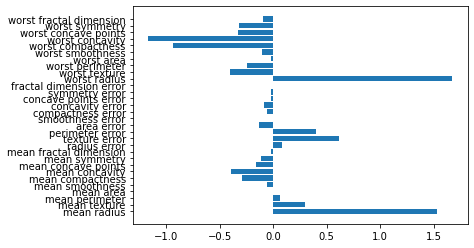

In [135]:
import matplotlib.pyplot as plt
plt.barh(x.columns.values, model.coef_[0])

In [114]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(hidden_layer_sizes=100, activation="tanh", max_iter=500, random_state=0)
model.fit(x_train, y_train)
pred = model.predict(x_test)

print(accuracy_score(y_test, pred))

0.956140350877193


In [71]:
wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2
